# LCMS

# LCMS

## Setup

In [ ]:
library(readxl)
library(data.table)
library(ggplot2)
library(patchwork)
library(here)

here() starts at C:/Users/alosvendsen/Documents/R/manuscript

## Donor 3, AS0013B, Midazolam

Check peak status’ for any amounts below what below/above the limit of our standard curve.

In [ ]:
donor_3_data <- 
  readRDS(here("notebooks/LCMS/data_processed/AS0013.rds"))

# Check peak status'
unique(donor_3_data$peak_status)

[1] NA             "Response Low"

  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  sample_name        amount peak_status   metabolite           donor treatment   time_treatment     time_incubation   rep   mean_amount   control_mean   relative_amount   mean_relative_amount
  ------------- ----------- ------------- ------------------ ------- ----------- ---------------- ----------------- ----- ------------- -------------- ----------------- ----------------------
  AS0008_135      0.9118640 Response Low  Hydroxymidazolam         2 10 ng/ml    72                             0.5     3      1.530223       7.625022         0.1195884              0.2006845
                                                                     IL-6                                                                                                

  AS0008_197      0.8381536 Response Low  Hydroxymidazolam         2 10 ng/ml    120                            0.5     1      3.593515      13.685163         0.0612454              0.2625847
                                                                     IL-6                                                                                                
  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Should this be omitted? It is below the lowest point on our standard curve, but omitting it would make the mean higher, than it really is?

### **Plots**

In [ ]:
# Create groups/look up tables for subsetting data
group_IL6 <- c(#"control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c(#"control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )

IL-6 effect on CYP3A4

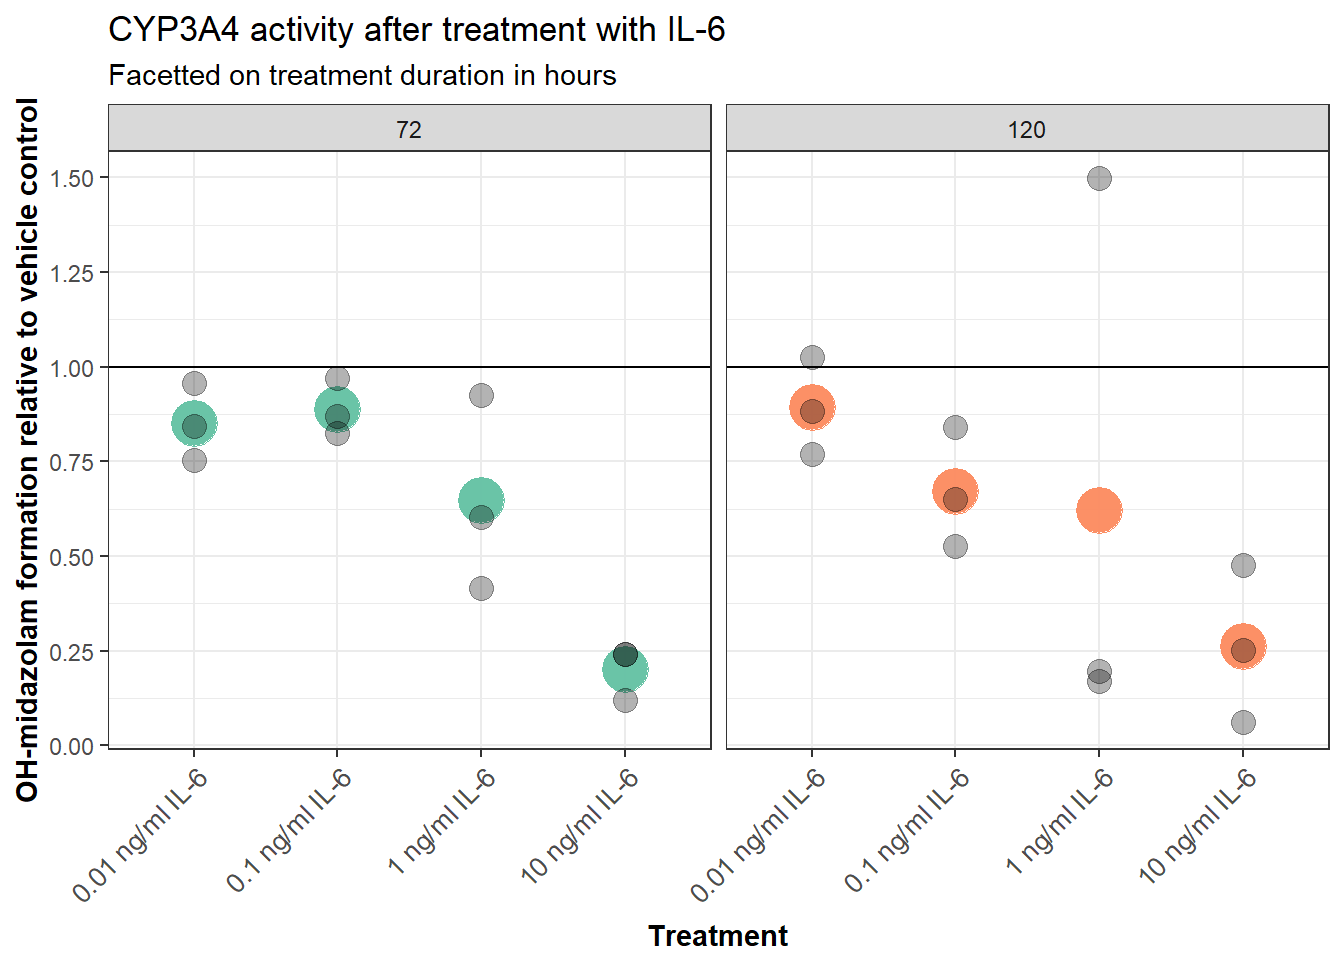

Saving 7 x 5 in image

In [ ]:
plot_data <- 
  donor_3_data[time_incubation == 0.5 
               & treatment %in% group_IL6
               ]


act_3A4_IL_6_AS0013 <- 
  ggplot(data = plot_data) +
  geom_point(aes(x = treatment,
                 y = mean_relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 8,
             alpha = 0.7,
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = relative_amount
                 ),
             size = 4,
             alpha = 0.3
             ) +
  geom_hline(yintercept = 1) +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 1.5, by= 0.25)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
    ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-6",
          subtitle = "Facetted on treatment duration in hours"
          ) +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
        )


act_3A4_IL_6_AS0013